# Introduction: Plotting with Plotly + Cufflinks in Python

In this notebook, we will see how to use [plotly](https://plot.ly/python/) and [cufflinks](https://github.com/santosjorge/cufflinks) to create stunning, interactive figures in a single line of Python. This combination of libraries is simple to use, makes excellent charts, and, in my opinion, much more efficient than other methods of plotting in Python.

This introduction will show us the basics of using plotly + cufflinks, focusing on what we can do in one line of code (for the most part). We'll see a wide variety of different charts, but won't get into the full capabilities of the library (such as updatable figures and using IPython widgets). 

Before you get started, you'll want to head to [Plotly](https://help.plot.ly/how-to-sign-up-to-plotly/#step-1-create-your-free-account) and create an account to get a username and api key. Then run the code below (this isn't actually necessary if you stick to `offline` plotting). 

    import plotly 
    # Replace with your information
    plotly.tools.set_credentials_file(username='DemoAccount', api_key='lr1c37zw81')

## Plotly + Cufflinks Overview

The Plotly Python library is an open-source version of the [Plotly](https://plot.ly/) visualization software made by Plotly. You can create a free account and upload your graphs to share with others (this requires making the graphs and data public). 

We will run plotly completely in offline mode which means that we won't be publishing any of our graphs online. However, we can still open up any of the plots in the Plotly [chart studio](https://plot.ly/create/#/) and edit them for a presentation. 

[Cufflinks is a wrapper ](https://github.com/santosjorge/cufflinks) around the plotly library specifically for plotting with Pandas dataframes. With cufflinks, we don't have to dig into the details of plotly, instead building our charts with minimal code. Basically, you can make charts directly in plotly for more control, or you can use cufflinks to rapidly prototype plots and explore the data.

In [4]:
# plotly standard imports
import plotly.graph_objs as go
import plotly.plotly as py

# Cufflinks wrapper on plotly
import cufflinks as cf

# Data science imports
import pandas as pd
import numpy as np

%matplotlib inline

# Options for pandas
pd.options.display.max_columns = 30

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

We'll be using plotly + cufflinks in offline mode. We will also set the global `cufflinks` theme to `pearl`. Later we'll take a look at the other theme options.

In [5]:
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)
cf.go_offline(connected=True)

# Set global theme
cf.set_config_file(world_readable=True, theme='pearl')

After importing cufflinks, plotly plots can be made using `df.iplot()` and then specifying parameters. This is a great replacement for matplotlib! 

### Data

We are using [Will Koehrsen's](https://medium.com/@williamkoehrsen) medium article statistics data. See [this article](https://towardsdatascience.com/analyzing-medium-story-stats-with-python-24c6491a8ff0) for how to use your own Medium data! [Here](https://github.com/WillKoehrsen/Data-Analysis/tree/master/medium) is the toolkit used to gather the stats. 

,claps,days_since_publication,fans,link,num_responses,publication,published_date,read_ratio,read_time,reads,started_date,tags,text,title,title_word_count,type,views,word_count,claps_per_word,editing_days,<tag>Education,<tag>Data Science,<tag>Towards Data Science,<tag>Machine Learning,<tag>Python
119,2,574.858594,2,https://medium.com/p/screw-the-environment-but...,0,None,2017-06-10 14:25:00,41.98,7,68,2017-06-10 14:24:00,"[Climate Change, Economics]","Screw the Environment, but Consider Your Walle...","Screw the Environment, but Consider Your Wallet",8,published,162,1859,0.001076,0,0,0,0,0,0
118,18,567.540639,3,https://medium.com/p/the-vanquishing-of-war-pl...,0,None,2017-06-17 22:02:00,32.93,14,54,2017-06-17 22:02:00,"[Climate Change, Humanity, Optimism, History]","The Vanquishing of War, Plague and Famine Part...","The Vanquishing of War, Plague and Famine",8,published,164,3891,0.004626,0,0,0,0,0,0
121,50,554.920762,19,https://medium.com/p/capstone-project-mercedes...,0,None,2017-06-30 12:55:00,20.19,42,215,2017-06-30 12:00:00,"[Machine Learning, Python, Udacity, Kaggle]",Capstone Project: Mercedes-Benz Greener Manufa...,Capstone Project: Mercedes-Benz Greener Manufa...,7,published,1065,12025,0.004158,0,0,0,0,1,1
122,0,554.078160,0,https://medium.com/p/home-of-the-scared-5af0fe...,0,None,2017-07-01 09:08:00,35.85,9,19,2017-06-30 18:21:00,"[Politics, Books, News, Media Criticism]",Home of the Scared A review of A Culture of Fe...,Home of the Scared,4,published,53,2533,0.000000,0,0,0,0,0,0
114,0,550.090507,0,https://medium.com/p/the-triumph-of-peace-f485...,0,None,2017-07-05 08:51:00,8.77,14,5,2017-07-03 20:18:00,"[Books, Psychology, History, Humanism]",The Triumph of Peace A review of The Better An...,The Triumph of Peace,4,published,57,3892,0.000000,1,0,0,0,0,0


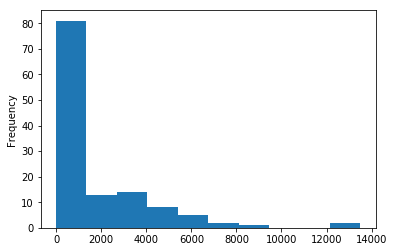

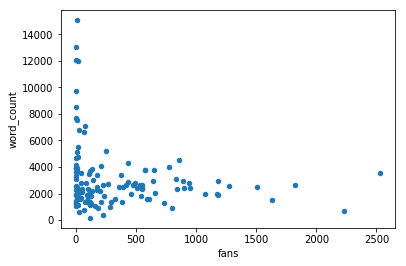

In [6]:
df = pd.read_parquet('Data/medium_data_2019_01_06')
df.head()

df['claps'].plot.hist()
df.plot(x='fans', y='word_count', kind='scatter')

### Kinds of Plots

We can make any of the following plots using cufflinks:

       scatter, bar, box, spread
       ratio, heatmap, surface
       histogram, bubble, bubble3d
       scatter3d, scattergeo, ohlc
       candle, pie, choroplet

# Univariate (Single Variable) Distributions

For single variables, I generally start out with histograms or boxplots. Plotly has these basic charts well-covered.

## Histograms

In [7]:
df['claps'].iplot(
    kind='hist',
    bins=30,
    xTitle='claps',
    linecolor='black',
    yTitle='count',
    title='Claps Distribution',
    text = 'Hello'
)

Notice that we can hover over any of the bars to get the exact numbers. You can also format the `text` to display different information on hovering.

### Percentage Histogram

To get the same chart but instead showing the percentage, we simple pass in `percent` as the histnorm parameter.

In [8]:
df['claps'].iplot(
    kind='hist',
    bins=30,
    xTitle='reads',
    linecolor='black',
    histnorm='percent',
    yTitle='percentage (%)',
    title='Reads Distribution in Percent')

## Grouped Histogram

When we want to display two different distributions on the same plot, we can group together the data to show it side-by-side. This means setting `barmode` to `group` with two distributions.

In [9]:
def to_time(dt):
    return dt.hour + dt.minute / 60

In [10]:
df['time_started'] = df['started_date'].apply(to_time)
df['time_published'] = df['published_date'].apply(to_time)

df[['time_started', 'time_published']].iplot(
    kind='hist',
    linecolor='black',
    bins=24,
    histnorm='percent',
    bargap=0.1,
    opacity=0.8,
    barmode='group',
    xTitle='Time of Day',
    yTitle='(%) of Articles',
    title='Time Started and Time Published')

## Overlaid Histogram

If we prefer the bars to be laid over one another, we specify the `barmode` to be `overlay`.

In [11]:
df[['time_published', 'time_started']].iplot(
    kind='hist',
    bins=24,
    linecolor='black',
    opacity=0.8,
    histnorm='percent',
    barmode='overlay',
    xTitle='Time of day',
    yTitle='(%) of articles',
    title='Time Started and Time Published Overlaid')

## Bar Plot

For a bar plot, we need to apply some sort of aggregation function and then plot. For example, we can show the `count` of articles in each publication with the following.

In [12]:
df.groupby('publication').count()['fans'].iplot(
    kind='bar', yTitle='Number of Articles', linecolor='black', title='Articles by Publication')

In [13]:
df[[c for c in df if '<tag>' in c]].sum().iplot(
    kind='bar',
    xTitle='Tag',
    yTitle='Number of Articles with Tag',
    title='Frequency of Tags',
    linecolor='black',
    sortbars=True)

## Bar Plot with Two Categories

Here we'll show two distributions side-by-side. First, we'll set the index to be the date, then resample to month frequency, then take the mean and plot.

In [14]:
df2 = df[['views', 'reads','published_date']].set_index('published_date').resample('M').mean()
df2.head()

,views,reads
published_date,,
2017-06-30,463.666667,112.333333
2017-07-31,5521.333333,1207.166667
2017-08-31,6242.800000,993.700000
2017-09-30,2113.000000,279.000000
2017-10-31,NaN,NaN


In [15]:
df2.iplot(
    kind='bar',
    xTitle='Date',
    yTitle='Average',
    title='Monthly Average Views and Reads')

By hovering over any month on the graph, we can make direct comparisons. This is a very handy way to explore your data! 

## Bar Plot with Second Y-Axis

If we want to put two very different ranges on the same graph, we can just use a secondary y-axis.

In [16]:
df2 = df[['views', 'read_time',
          'published_date']].set_index('published_date').resample('M').mean()

df2.iplot(
    kind='bar',
    xTitle='Date',
    secondary_y='read_time',
    secondary_y_title='Average Read Time',
    yTitle='Average Views',
    title='Monthly Averages')

## Boxplot

The boxplot is another good method for showing distributions.

In [17]:
df[['claps', 'fans']].iplot(secondary_y='fans', secondary_y_title='Fans',
    kind='box', yTitle='Claps', title='Box Plot of Claps and Fans')

Hover over the graphs to see the actual statistics! 

### Boxplot with Different Categories

If we have different categories that we want to plot, we need to use a `pivot`. This transforms each unique value in a column into a separate column.

In [18]:
df2 = df.pivot(columns='publication', values='fans')
df2.head()

publication,Engineering @ Feature Labs,None,Noteworthy - The Journal Blog,The Reality Project,Towards Data Science
0,NaN,NaN,NaN,34.0,NaN
1,NaN,NaN,NaN,29.0,NaN
2,NaN,NaN,NaN,13.0,NaN
3,NaN,34.0,NaN,NaN,NaN
4,NaN,47.0,NaN,NaN,NaN


Here we are also explicitly specifying the layout as a dictionary. This gives us more control over different aspects of the plot such as the margin (like the border of the image).

In [19]:
df2.iplot(kind='box',
         layout=dict(
            height=600,
            yaxis=dict(title='fans'),
            title='Fans by Publication',
            margin=dict(b=140)))

In [20]:
df[df['read_time'] <= 10].pivot(
    columns='read_time', values='reads').iplot(
        kind='box', colorscale='set2',
        xTitle='Read Time',
        yTitle='Number of Reads',
        title='Box Plot of Reads by Reading Time')

# Scatter Plots

The scatter plot is a simple yet effective method for visualizing the relationship between two variables. There are many ways we can make scatterplots in plotly + cufflinks.

## Time-Series

It's very simple to make time-series plots if we set the index to be the datetime. Then we can simply pass in a column as y and plotly will know to use the index to make a date xaxis. 

In [21]:
tds = df[df['publication'] == 'Towards Data Science'].set_index(
    'published_date')

tds.head()

,claps,days_since_publication,fans,link,num_responses,publication,read_ratio,read_time,reads,started_date,tags,text,title,title_word_count,type,views,word_count,claps_per_word,editing_days,<tag>Education,<tag>Data Science,<tag>Towards Data Science,<tag>Machine Learning,<tag>Python,time_started,time_published
published_date,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-12-27 11:20:00,4800,374.986885,861,https://towardsdatascience.com/random-forest-i...,27,Towards Data Science,17.68,21,28566,2017-12-26 15:11:00,"[Machine Learning, Data Science, Random Forest...",Random Forest in Python A Practical End-to-End...,Random Forest in Python,4,published,161596,4494,1.068091,0,0,1,0,1,1,15.183333,11.333333
2018-01-06 20:15:00,857,364.615092,112,https://towardsdatascience.com/improving-rando...,6,Towards Data Science,22.76,17,7207,2018-01-03 21:38:00,"[Machine Learning, Python, Data Science, Learn...",Improving the Random Forest in Python Part 1 G...,Improving the Random Forest in Python Part 1,8,published,31659,3504,0.244578,2,0,1,0,1,1,21.633333,20.250000
2018-01-07 20:37:00,186,363.599979,45,https://towardsdatascience.com/data-science-a-...,1,Towards Data Science,28.64,15,775,2018-01-07 13:18:00,"[Data Science, Data, Weight Loss, Programming]",Data Science: A Personal Application Charting ...,Data Science: A Personal Application,5,published,2706,3569,0.052115,0,0,1,0,0,0,13.300000,20.616667
2018-01-08 16:58:00,119,362.752029,43,https://towardsdatascience.com/a-theory-of-pre...,2,Towards Data Science,31.53,11,740,2018-01-02 17:23:00,"[Statistics, Data Science, Book Review, Books]",A Theory of Prediction Review of The Signal an...,A Theory of Prediction,4,published,2347,2817,0.042244,5,0,1,0,0,0,17.383333,16.966667
2018-01-09 21:49:00,2000,361.550093,392,https://towardsdatascience.com/hyperparameter-...,12,Towards Data Science,23.99,12,25505,2018-01-09 12:26:00,"[Machine Learning, Python, Data Science, Data]",Hyperparameter Tuning the Random Forest in Pyt...,Hyperparameter Tuning the Random Forest in Python,7,published,106311,2456,0.814332,0,0,1,0,1,1,12.433333,21.816667


In [22]:
tds['read_time'].iplot(
    mode='lines+markers',
    opacity=0.8,
    size=8,
    symbol=1,
    xTitle='Date',
    yTitle='Read Time (min)',
    title='Read Time Trends')

## Two Variables Time-Series

For a second variable, we just add it in. 

In [23]:
tds[['claps', 'fans']].iplot(
    mode='lines+markers',
    opacity=0.8,
    size=8,
    symbol=1,
    xTitle='Date',
    yTitle='Fans and Claps',
    title='Fans and Claps over Time')

That is a little hard to compare, so we should instead add the second variable on a secondary y-axis.

In [24]:
tds[['fans', 'word_count', 'title']].iplot(
    y='fans',
    mode='lines+markers',
    secondary_y = 'word_count',
    secondary_y_title='Word Count',
    opacity=0.8,
    size=8,
    symbol=1,
    xTitle='Date',
    yTitle='Claps',
    text='title',
    title='Fans and Word Count over Time')

## Text Annotations on Plot

Adding text to plots is pretty simple (just the formatting can be a bit tricky). The text is written in HTML which gives us control over the formatting.

In [25]:
tds_monthly_totals = tds.resample('M').sum()

tds_monthly_totals['text'] = [
    f'<span style="color:blue">{m}<span><br>words: {w:.0f}'
    for m, w in zip(tds_monthly_totals.index.month_name(),
                    tds_monthly_totals['word_count'])
]

tds_monthly_totals.iplot(
    mode='lines+markers+text',
    text='text',
    y='word_count',
    opacity=0.8,
    xTitle='Date',
    yTitle='Word Count',
    title='Total Word Count by Month')

## Two Numeric Variables Scatterplot

In [26]:
tds.iplot(
    x='read_time',
    y='read_ratio',
    xTitle='Read Time',
    yTitle='Reading Percent',
    text='title',
    mode='markers',
    title='Reading Percent vs Reading Time')

## Two Variables with Best Fit Line

In [27]:
tds.sort_values('read_time').iplot(
    x='read_time',
    y='read_ratio',
    xTitle='Read Time',
    yTitle='Reading Percent',
    text='title',
    mode='markers+lines',
    bestfit=True, bestfit_colors=['blue'],
    title='Reading Percent vs Reading Time')

/home/jayrodge/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



## Log Scale

In [28]:
layout = dict(
    xaxis=dict(type='log', title='Word Count'),
    yaxis=dict(title='views'),
    title='Views vs Word Count Log Axis')

tds.sort_values('word_count').iplot(
    x='word_count',
    y='views',
    layout=layout,
    text='title',
    mode='markers',
    bestfit=True,
    bestfit_colors=['blue'])

/home/jayrodge/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



## Scatterplot By Category

In [29]:
df.iplot(
    x='read_time',
    y='read_ratio',
    categories='publication',
    xTitle='Read Time',
    yTitle='Reading Percent',
    title='Reading Percent vs Read Ratio by Publication')

## Cumulative Plot

We can make cumulative plots by adding up the statistics over time.

In [30]:
df.set_index('published_date')[['views', 'word_count']].cumsum().iplot(y='views', secondary_y='word_count',
                                                 yTitle='Views', secondary_y_title='Word Count',
                                                 title='Views and Word Count Totals')

In [31]:
df.pivot_table(
    values='views', index='published_date',
    columns='publication').cumsum().iplot(
        mode='markers+lines',
        size=8,
        symbol=[1, 2, 3, 4, 5],
        layout=dict(
            xaxis=dict(title='Date'),
            yaxis=dict(type='log', title='Total Views'),
            title='Total Views over Time by Publication'))

# More than 2 Variables

We can expand to greater than 2 variables by encoding information in the colors, size of markers, or symbols. We can also use secondary y-axes for more information.



## Secondary Y-Axis

In [32]:
tds[['word_count', 'reads', 'read_ratio', 'title']].iplot(
    x='word_count',
    y='reads',
    secondary_y='read_ratio',
    xTitle='Word Count',
    yTitle='Reads',
    secondary_y_title='Read Ratio',
    mode='markers',
    size=10,
    text='title',
    title='Reads and Read Ratio vs Number of Words')

## Three Variables with a Category

In [33]:
df.iplot(
    x='word_count',
    y='views',
    categories='publication',
    mode='markers',
    text='title',
    size=8,
    layout=dict(
        xaxis=dict(title='Word Count'),
        yaxis=dict(title='Views'),
        title='Views vs Word Count by Publication'))

## Three Numeric Variables

In [34]:
text = [
    f'Title: {t} <br> Ratio: {r:.2f}%'
    for t, r in zip(tds['title'], tds['read_ratio'])
]

tds.iplot(
    x='word_count',
    y='reads',
    opacity=0.8,
    size=tds['read_ratio'],
    text=text,
    mode='markers',
    theme='pearl',
    layout=dict(
        xaxis=dict(type='log', title='Word Count'),
        yaxis=dict(title='Reads'),
        title='Reads vs Log Word Count Sized by Read Ratio'))

## Four Variables

In [35]:
data = [
    go.Scatter(
        x=df['word_count'],
        y=df['reads'],
        text=df['title'],
        mode='markers',
        marker=dict(
            sizemin=10,
            size=df['read_ratio'],
            colorscale='Rainbow',
            showscale=True,
            color=df['read_time'],
            line=dict(color='black', width=1.2)))
]

figure = go.Figure(
    data=data,
    layout=go.Layout(
        xaxis=dict(title='Word Count'),
        yaxis=dict(title='Reads'),
        title='Reads vs Word Count Colored by Read Time and Sized by Read Ratio'
    ))

iplot(figure)

## Five Variables

In [36]:
data = [
    go.Scatter(
        x=grouped['word_count'],
        y=grouped['reads'],
        text=grouped['title'],
        mode='markers',
        name=name,
        marker=dict(
            symbol=i,
            sizemin=2,
            sizeref=2,
            size=grouped['read_ratio'],
            colorscale='BlueRed',
            showscale=True,
            color=df['read_time'],
            line=dict(color='black', width=1.2)))
    for i, (name, grouped) in enumerate(df.groupby('publication'))
]

figure = go.Figure(
    data=data,
    layout=go.Layout(
        legend=dict(x=1.2),
        width=1000,
        margin=dict(r=20),
        xaxis=dict(type='log', title='Word Count'),
        yaxis=dict(title='Reads'),
        title='Reads vs Word Count Colored by Read Time, Sized by Read Ratio, and Shaped by Publication'
    ))

iplot(figure)

# Limiting Range and Adding Lines to Plots

In [37]:
tds[['read_time', 'fans', 'title']].iplot(
    y='read_time',
    mode='lines+markers',
    secondary_y = 'fans',
    secondary_y_title='Fans',
    vline=[dict(x=pd.to_datetime('2018-04-01'), color='red', dash='dash', width=3),
            dict(x=pd.to_datetime('2018-06-01'), color='red', dash='dash', width=3),],
    opacity=0.8,
    size=8,
    symbol=1,
    xTitle='Date',
    yTitle='Read Time',
    text='title',
    title='Reading Time and Claps over Time')

In [38]:
tds[['read_time', 'fans', 'title']].iplot(
    y='read_time',
    mode='lines+markers',
    secondary_y = 'fans',
    secondary_y_title='Fans',
    vspan=[dict(x0='2018-05-01', 
                x1='2018-08-01',
                color='green', fill='green', 
                opacity=0.2)],
    hline=[dict(y=i, color='red', dash='dash', width=1) for i in [5, 10, 15, 20]],
    xrange=('2018-01-01', '2019-01-01'),
    opacity=0.8,
    size=8,
    symbol=1,
    xTitle='Date',
    yTitle='Read Time',
    text='title',
    title='Reading Time and Claps over Time')

In [39]:
tds['read_time'].iplot(
    mode='lines+markers',
    vline=[dict(x=pd.to_datetime('2018-01-01'), color='blue', dash='dash'),
            dict(x=pd.to_datetime('2019-01-01'), color='blue', dash='dash'),],
    opacity=0.8,
    size=8,
    symbol=1,
    xTitle='Date',
    yTitle='Read Time (min)',
    title='Read Time Trends')

# Scatter Matrix

In [40]:
colorscales = [
    'Greys', 'YlGnBu', 'Greens', 'YlOrRd', 'Bluered', 'RdBu', 'Reds', 'Blues',
    'Picnic', 'Rainbow', 'Portland', 'Jet', 'Hot', 'Blackbody', 'Earth',
    'Electric', 'Viridis', 'Cividis'
]

In [41]:
import plotly.figure_factory as ff

figure = ff.create_scatterplotmatrix(
    df[['claps', 'publication', 'views', 'read_ratio', 'word_count']],
    height=1000,
    width=1000,
    text=df['title'],
    diag='histogram',
    index='publication')
iplot(figure)

# Heatmap

In [42]:
colorscales = [
    'Greys', 'YlGnBu', 'Greens', 'YlOrRd', 'Bluered', 'RdBu', 'Reds', 'Blues',
    'Picnic', 'Rainbow', 'Portland', 'Jet', 'Hot', 'Blackbody', 'Earth',
    'Electric', 'Viridis', 'Cividis'
]

In [43]:
corrs = df.corr()

figure = ff.create_annotated_heatmap(
    z=corrs.values,
    x=list(corrs.columns),
    y=list(corrs.index),
    colorscale='Earth',
    annotation_text=corrs.round(2).values,
    showscale=True, reversescale=True)

figure.layout.margin = dict(l=200, t=200)
figure.layout.height = 800
figure.layout.width = 1000

iplot(figure)

# Spread

In [44]:
df.set_index('published_date')[['views', 'reads']].iplot(
    kind='spread', mode='markers', yTitle='Number', title='Spread between Views and Reads')

# Ratio

In [45]:
df.set_index('published_date')[['views', 'reads']].iplot(theme='pearl',
                                                         kind='ratio', title='Ratio of Views to Reads', mode='markers')

# Themes

In [ ]:
themes = cf.themes.THEMES.keys()
themes

dict_keys(['ggplot', 'pearl', 'solar', 'space', 'white', 'polar', 'henanigans'])

In [ ]:
for t in themes:
    df[['time_published', 'time_started']].iplot(
    kind='hist',
    bins=48,
    linecolor='black',
    opacity=0.8,
    histnorm='percent',
    barmode='overlay',
    xTitle='Time of day',
    yTitle='(%) of articles',
        theme=t,
    title=f'{t} Time Started and Time Published Overlaid')

## Colorscales in cufflinks

In [ ]:
cf.colors.scales()

## Colorscales in Plotly

In [ ]:
colorscales = [
    'Greys', 'YlGnBu', 'Greens', 'YlOrRd', 'Bluered', 'RdBu', 'Reds', 'Blues',
    'Picnic', 'Rainbow', 'Portland', 'Jet', 'Hot', 'Blackbody', 'Earth',
    'Electric', 'Viridis', 'Cividis'
]

# Pie Chart

In [ ]:
df.groupby(
    'publication', as_index=False)['reads'].count().iplot(
        kind='pie', labels='publication', values='reads', title='Percentage of Reads by Publication')

In [ ]:
df.groupby(
    'publication', as_index=False)['word_count'].sum().iplot(
        kind='pie', labels='publication', values='word_count', title='Percentage of Words by Publication')

# 3D Surface Plot

In [ ]:
df[['views', 'reads', 'read_ratio']].iplot(
    kind='surface', title='Surface Plot')

# 3D Scatter Plot

In [ ]:
df.iplot(x='word_count', y='views', z='fans', kind='scatter3d', xTitle='Word Count', yTitle='Views',
         zTitle='Fans', theme='pearl',
         categories='type', title='3D Scatter Plot by Type')

# 3D Bubble Chart

In [ ]:
df.iplot(x='word_count', y='views', z='fans', kind='bubble3d', xTitle='Word Count', yTitle='Views',
         zTitle='Fans', theme='pearl', size='read_ratio',
         categories='type', title='3D Bubble Plot Sized by Read Ratio and Colored by Type')

# Editing in Plot Studio

You can take any of the plots here and edit them in the plot studio. This allows us to finish up plots for showing to others or sharing.

![](../medium/images/reads_vs_word_count.png)

![](../medium/images/annotations.png)

![](../medium/images/word_count_and_views.png)

# IPython Widgets

In [ ]:
import ipywidgets as widgets

In [ ]:
def show_date(date):
    return df[df['published_date'] >= pd.to_datetime(date)]

In [ ]:
date_selection = widgets.DatePicker(value=pd.to_datetime('2018-12-25'))

widgets.interact(show_date, date=date_selection)

# Conclusions

Hopefully you now have a little idea of the capabilties of plotly + cufflinks. We have only scrachted the surface of this library, so check out the [cufflinks documentation](https://github.com/santosjorge/cufflinks) and the [plotly documentation](https://plot.ly/python/) for plently of more examples.

![](../medium/images/plotting_enjoyment.png)